In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objs as go
import plotly.express as px
import tensorflow as tf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from scipy import stats
import warnings
from sklearn.metrics import classification_report,accuracy_score
import gdown
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
np.random.seed(0)
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# read our data in using 'pd.read_csv('file')'
data_path  = 'german_data.csv'
df= pd.read_csv(data_path)

In [ ]:
# check the decoration
print(df.columns)
print(df.shape)

Index(['stat_check_acc', 'duration_month', 'credit_history', 'purpose',
       'credit_amount', 'Age Group', 'savings_bonds', 'employment_since',
       'installment_in_percent', 'sex', 'debtors_guarant', 'residence_since',
       'property', 'other_installment_plans', 'housing', 'nr_credits', 'job',
       'nr_dependants', 'phone', 'approval'],
      dtype='object')
(1000, 20)


In [ ]:

df.duplicated().sum()

0

In [ ]:
df.isna().sum()

stat_check_acc             0
duration_month             0
credit_history             0
purpose                    0
credit_amount              0
Age Group                  0
savings_bonds              0
employment_since           0
installment_in_percent     0
sex                        0
debtors_guarant            0
residence_since            0
property                   0
other_installment_plans    0
housing                    0
nr_credits                 0
job                        0
nr_dependants              0
phone                      0
approval                   0
dtype: int64

In [ ]:


df.head()

,stat_check_acc,duration_month,credit_history,purpose,credit_amount,Age Group,savings_bonds,employment_since,installment_in_percent,sex,debtors_guarant,residence_since,property,other_installment_plans,housing,nr_credits,job,nr_dependants,phone,approval
0,1,6,5,4,1169,1,5,5,4,0,1,4,1,3,2,2,3,1,2,1
1,2,48,3,4,5951,0,1,3,2,1,1,2,1,3,2,1,3,1,1,0
2,4,12,5,7,2096,0,1,4,2,0,1,3,1,3,2,1,2,2,1,1
3,1,42,3,3,7882,0,1,4,2,0,3,4,2,3,3,1,3,2,1,1
4,1,24,4,1,4870,1,1,3,3,0,1,4,4,3,3,2,3,2,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   stat_check_acc           1000 non-null   int64
 1   duration_month           1000 non-null   int64
 2   credit_history           1000 non-null   int64
 3   purpose                  1000 non-null   int64
 4   credit_amount            1000 non-null   int64
 5   Age Group                1000 non-null   int64
 6   savings_bonds            1000 non-null   int64
 7   employment_since         1000 non-null   int64
 8   installment_in_percent   1000 non-null   int64
 9   sex                      1000 non-null   int64
 10  debtors_guarant          1000 non-null   int64
 11  residence_since          1000 non-null   int64
 12  property                 1000 non-null   int64
 13  other_installment_plans  1000 non-null   int64
 14  housing                  1000 non-null   int64
 15  nr_cr

In [ ]:
df.describe()

,stat_check_acc,duration_month,credit_history,purpose,credit_amount,Age Group,savings_bonds,employment_since,installment_in_percent,sex,debtors_guarant,residence_since,property,other_installment_plans,housing,nr_credits,job,nr_dependants,phone,approval
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,3.54500,3.828000,3271.258000,0.125000,2.105000,3.384000,2.973000,0.310000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.736876,0.330884,1.580023,1.208306,1.118715,0.462725,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.458487
min,1.000000,4.000000,1.00000,1.000000,250.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,3.00000,2.000000,1365.500000,0.000000,1.000000,3.000000,2.000000,0.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,3.00000,3.000000,2319.500000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,4.000000,24.000000,5.00000,4.000000,3972.250000,0.000000,3.000000,5.000000,4.000000,1.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,4.000000,72.000000,5.00000,11.000000,18424.000000,1.000000,5.000000,5.000000,4.000000,1.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,1.000000


In [ ]:

df.isnull().sum()

stat_check_acc             0
duration_month             0
credit_history             0
purpose                    0
credit_amount              0
Age Group                  0
savings_bonds              0
employment_since           0
installment_in_percent     0
sex                        0
debtors_guarant            0
residence_since            0
property                   0
other_installment_plans    0
housing                    0
nr_credits                 0
job                        0
nr_dependants              0
phone                      0
approval                   0
dtype: int64

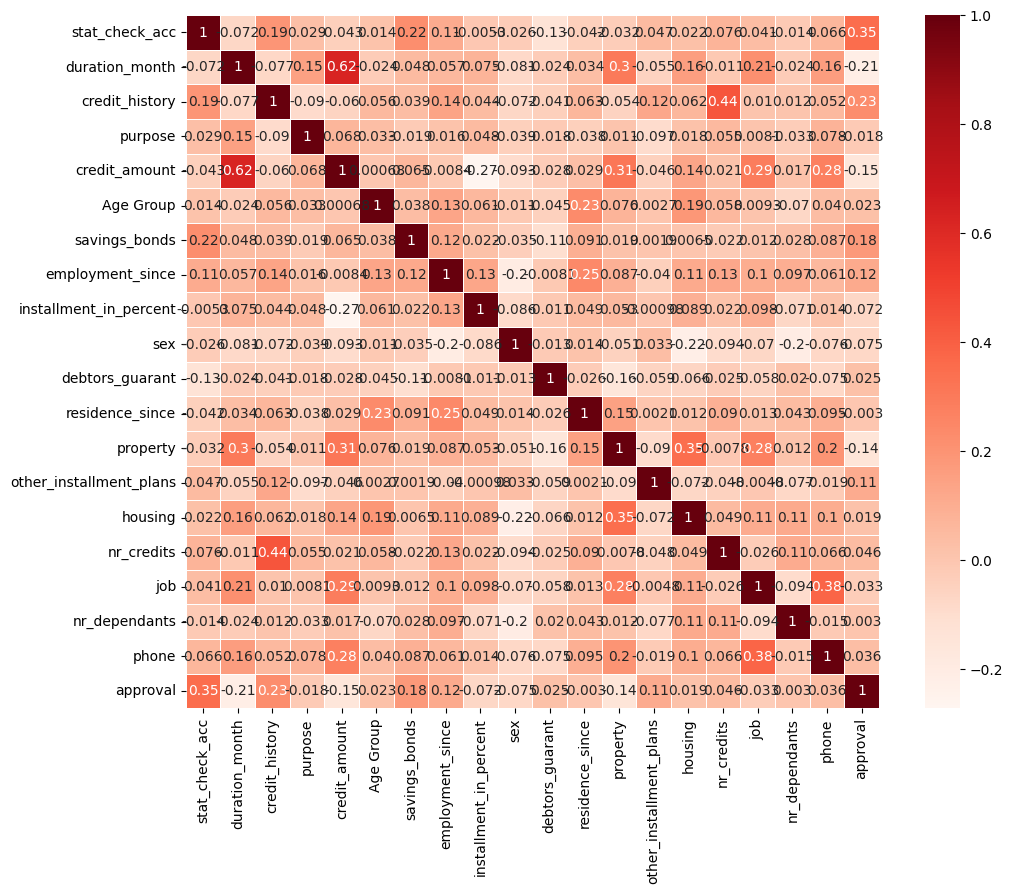

In [ ]:
#Correlation Matrix

correlation_matrix = df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,annot=True,square=True, linewidths=.5,cmap=plt.cm.Reds)
plt.show()

In [ ]:
sensitive_att= 'sex'

In [ ]:

X = df.drop(columns=['approval'])
y = df['approval']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify = y_train, random_state=1)


In [ ]:
#apply SMOTE to the trainingset
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

columns = X_train.columns
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['approval'])

In [ ]:


# Check the numbers of our data
print("Length of oversampled data is ", len(os_data_X))
print("Length of oversampled target variable is ", len(os_data_y))
print("Number of 'no approval' in oversampled data:", len(os_data_y[os_data_y['approval'] == 0]))
print("Number of 'approval' in oversampled data:", len(os_data_y[os_data_y['approval'] == 1]))
print("Proportion of 'no approval' data in oversampled data: {:.2f}".format(len(os_data_y[os_data_y['approval'] == 0]) / len(os_data_X)))
print("Proportion of 'approval' data in oversampled data: {:.2f}".format(len(os_data_y[os_data_y['approval'] == 1]) / len(os_data_X)))


Length of oversampled data is  840
Length of oversampled target variable is  840
Number of 'no approval' in oversampled data: 420
Number of 'approval' in oversampled data: 420
Proportion of 'no approval' data in oversampled data: 0.50
Proportion of 'approval' data in oversampled data: 0.50


In [ ]:
from aif360.datasets import BinaryLabelDataset


dataset_orig = BinaryLabelDataset(
    favorable_label=1,  # Define the favorable class
    unfavorable_label=0,  # Define the unfavorable class
    df=df,  # Pass your DataFrame
    label_names=['Age Group'],  # Define the column name for labels
    protected_attribute_names=['sex'],  # Define the column name for protected attribute
    unprivileged_protected_attributes=[[0]],
    privileged_protected_attributes=[[1]]
)


In [ ]:
unprivileged_groups = [{'sex': 0}]
privileged_groups = [{'sex': 1}]


In [ ]:
dataset_orig_train, dataset_orig_test = dataset_orig.split([0.7], shuffle=True)

In [ ]:

from aif360.metrics import BinaryLabelDatasetMetric


metric_orig_train = BinaryLabelDatasetMetric(dataset_orig_train,
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())


Difference in mean outcomes between unprivileged and privileged groups = -0.004211


In [ ]:
pip install aif360


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.9 MB/s eta 0:00:00


In [ ]:

from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(os_data_X, os_data_y)
y_pred = knn.predict(os_data_X)
from sklearn.metrics import classification_report
print(classification_report(os_data_y, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       420
           1       0.70      0.61      0.65       420

    accuracy                           0.67       840
   macro avg       0.68      0.67      0.67       840
weighted avg       0.68      0.67      0.67       840



In [ ]:

matrix = confusion_matrix(os_data_y, y_pred)
accuracy = accuracy_score(os_data_y, y_pred)

print("Confusion Matrix:")
print(matrix)
print("Accuracy:", accuracy)


Confusion Matrix:
[[309 111]
 [163 257]]
Accuracy: 0.6738095238095239


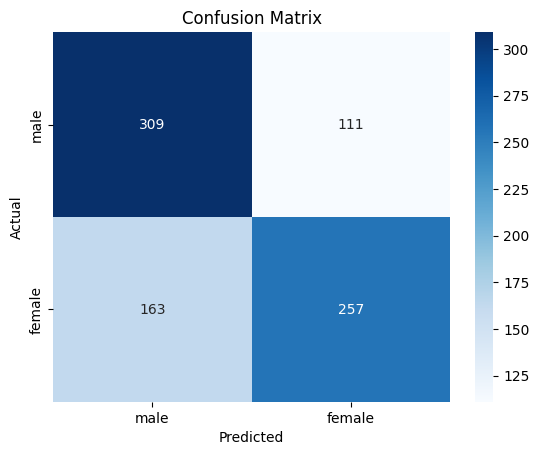

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
matrix = confusion_matrix(os_data_y, y_pred)

# Define labels for the confusion matrix
class_names = ['male', 'female']

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [ ]:
result = pd.concat([os_data_X, os_data_y.reindex(os_data_X.index)], axis=1)
prob  = knn.predict_proba(os_data_X)[:,1]


result['prob'] = prob
print(result)

     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 4               6               3        1            672   
1                 3              15               3        7            392   
2                 4              21               3        1           2782   
3                 4              18               3       10           1568   
4                 1              12               3        4            709   
..              ...             ...             ...      ...            ...   
835               1              22               3        3           2447   
836               3               9               1        2           1326   
837               4              12               3        4           1514   
838               3              34               2        1           7472   
839               1              24               5        1           1202   

     Age Group  savings_bonds  employment_since  in

In [ ]:
result_sorted = result.sort_values(by=[sensitive_att, 'prob'], ascending=[True, False], ignore_index=True)
result_sorted["action"] = pd.Series([0 for x in range(len(result_sorted.index))])

result_sorted

,stat_check_acc,duration_month,credit_history,purpose,credit_amount,Age Group,savings_bonds,employment_since,installment_in_percent,sex,...,property,other_installment_plans,housing,nr_credits,job,nr_dependants,phone,approval,prob,action
0,1,21,3,1,3763,0,5,4,2,0,...,1,3,2,1,2,1,1,1,0.933333,0
1,4,24,3,4,1413,0,1,3,4,0,...,2,3,2,1,3,1,1,1,0.933333,0
2,4,18,5,3,3780,0,1,2,3,0,...,3,3,2,2,4,1,2,1,0.933333,0
3,2,12,5,5,1424,0,1,4,4,0,...,2,3,2,1,3,1,1,1,0.933333,0
4,1,12,5,2,1409,1,1,5,4,0,...,1,3,2,1,3,1,1,1,0.933333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,2,24,3,2,12579,0,1,5,4,1,...,4,3,3,1,4,1,2,0,0.133333,0
836,4,48,5,2,11590,0,2,3,2,1,...,3,1,1,2,2,1,1,0,0.133333,0
837,2,24,3,2,11560,0,1,3,1,1,...,3,3,1,2,4,1,1,0,0.066667,0
838,4,43,4,2,11357,0,1,2,2,1,...,3,1,1,2,2,1,1,0,0.066667,0


In [ ]:
S = sensitive_att
y = 'approval'
sv = 1
nv=  0
df=  result_sorted
DP = 0
DN = 0
FP = 0
FN = 0

for row in range(len(df)) :
    if df.at[row, S] == 1 and df.at[row, y] == 0:
        DN +=1
    elif df.at[row, S] == 1 and df.at[row, y] == 1:
        DP += 1
    elif df.at[row, S] == 0 and df.at[row, y] == 0:
        FN += 1
    else:
        FP += 1

print(DP, DN, FP, FN )
    #identify needed group sizes

df_size = DN + DP + FN + FP
size_group = (df_size/4)

print(DN, size_group)


131 100 289 320
100 210.0


In [ ]:
df["action"] = pd.Series([0 for x in range(len(df.index))])

sort_DN = df.sort_values(by=[ S, 'prob'], ascending=[False, False], ignore_index=True)
dn_count = DN

if DN > size_group:
    for row in range(len(sort_DN)):
        if dn_count > size_group and sort_DN.at[row, S] == sv and sort_DN.at[row, y] == 0:
            sort_DN.at[row, "action"] == 2
            dn_count -= 1
        else:
            pass
        #return sort_DN
    else:
        pass
    #print(dn_count, DN, size_group)
print (sort_DN)

     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 3              12               3        3           1424   
1                 4              13               3        4           1409   
2                 2              24               3        4           3758   
3                 4              12               5       10           1412   
4                 3              21               3        1           2923   
..              ...             ...             ...      ...            ...   
835               1              27               3        5           4204   
836               3              22               4        1           1343   
837               2              48               3        3          11231   
838               2              34               2       10           4242   
839               1              23               3        3           4204   

     Age Group  savings_bonds  employment_since  in

In [ ]:
sort_DP = sort_DN.sort_values(by=[S, 'prob'], ascending=[False, True], ignore_index=True)


if DP < size_group:
    dp_count = DP
    for row in range(len(sort_DP)):
        if dp_count < size_group and sort_DP.at[row, S] == sv and sort_DP.at[row, y] == 1:
            sort_DP.at[row, "action"] = 1
                #print(sort_DP.at[row, "action"])
            dp_count += 1
        else:
            pass
print(sort_DP)


     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 2              24               3        2          11560   
1                 4              43               4        2          11357   
2                 4              46               4        2          11508   
3                 2              24               3        2          12579   
4                 4              48               5        2          11590   
..              ...             ...             ...      ...            ...   
835               2               8               3        4           1414   
836               2              12               1        9           1410   
837               4              12               3        2           1413   
838               2              14               3       10           1410   
839               4              11               3        1           1414   

     Age Group  savings_bonds  employment_since  in

In [ ]:
sort_DP['action'].value_counts()

0    761
1     79
Name: action, dtype: int64

In [ ]:
sort_FN = sort_DP.sort_values(by=[sensitive_att, 'prob'], ascending=[True, False], ignore_index=True)

if FN < size_group:
    fn_count = FN

    for row in range(len(sort_FN)):
        if dn_count < size_group and sort_FN.at[row, S] == nv and sort_FN.at[row, y] == 0:
            sort_FN.at[row, "action"] = 1
            fn_count += 1
        else:
            pass
    else:
        pass

In [ ]:
sort_FP = sort_FN.sort_values(by=[sensitive_att, 'prob'], ascending=[True, True], ignore_index=True)

if FP > size_group:
    fp_count = FP
    for row in range(len(sort_FP)):
        if fp_count > size_group and sort_FP.at[row, S] == 1 and sort_FP.at[row, y] == 1:
            sort_FP.at[row, "action"] = 2
            fp_count -= 1
        else:
            pass


    else:
        pass


In [ ]:
print(sort_FP)
sort_FP['action'].value_counts()

     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 2              15               2        1           6850   
1                 1              24               4        1           1333   
2                 1              39               5        3          14179   
3                 1              24               1        3           4110   
4                 4              21               5        1          12680   
..              ...             ...             ...      ...            ...   
835               4               9               3        3           2301   
836               3              12               3        3           1424   
837               4              13               3        4           1409   
838               2              24               3        4           3758   
839               4              12               5       10           1412   

     Age Group  savings_bonds  employment_since  in

0    761
2     79
Name: action, dtype: int64

In [ ]:
df_duplicate = sort_FP
df_duplicate = df_duplicate.drop(df_duplicate[df_duplicate.action == 2].index)
df_duplicate = df_duplicate.drop(df_duplicate[df_duplicate.action == 0].index)
print (df_duplicate)

Empty DataFrame
Columns: [stat_check_acc, duration_month, credit_history, purpose, credit_amount, Age Group, savings_bonds, employment_since, installment_in_percent, sex, debtors_guarant, residence_since, property, other_installment_plans, housing, nr_credits, job, nr_dependants, phone, approval, prob, action]
Index: []

[0 rows x 22 columns]


In [ ]:
sort_FP.append(df_duplicate)
final_dataset = sort_FP.drop(df_duplicate[df_duplicate.action == 2].index)
final_dataset = final_dataset.drop(columns=['prob', 'action'])
print(final_dataset)

     stat_check_acc  duration_month  credit_history  purpose  credit_amount  \
0                 2              15               2        1           6850   
1                 1              24               4        1           1333   
2                 1              39               5        3          14179   
3                 1              24               1        3           4110   
4                 4              21               5        1          12680   
..              ...             ...             ...      ...            ...   
835               4               9               3        3           2301   
836               3              12               3        3           1424   
837               4              13               3        4           1409   
838               2              24               3        4           3758   
839               4              12               5       10           1412   

     Age Group  savings_bonds  employment_since  in

# Random Forest

In [ ]:


# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.45      0.55        60
           1       0.80      0.92      0.85       140

    accuracy                           0.78       200
   macro avg       0.75      0.69      0.70       200
weighted avg       0.77      0.78      0.76       200



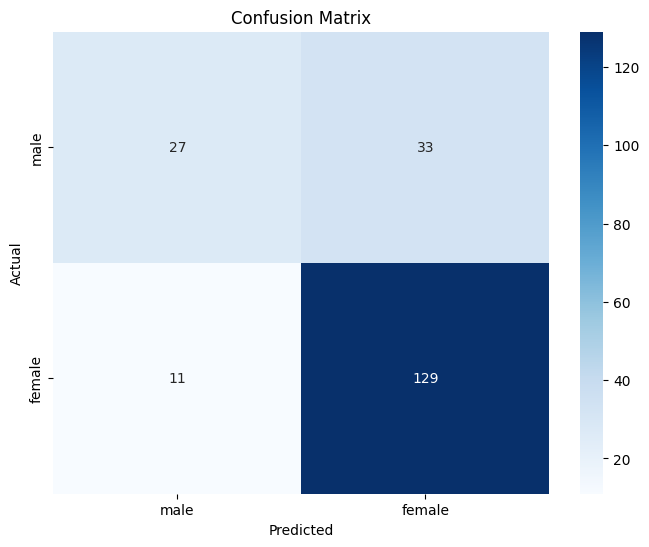

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['male', 'female'],
            yticklabels=['male', 'female'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


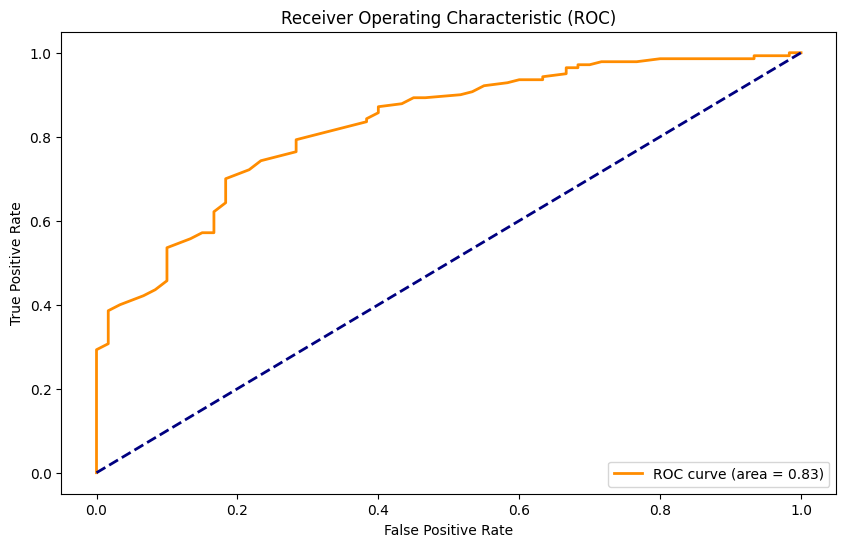

In [ ]:


y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
privileged_groups = [{sensitive_att: 0}]
unprivileged_groups = [{sensitive_att: 1}]
cost_constraint = "fnr"
randseed = 12345679

In [ ]:
fair_test_df = pd.concat([X_test, y_test], axis=1, join="inner")

In [ ]:
pip install fairlearn

In [ ]:
pip install aif360

In [ ]:
# Metrics function
from collections import OrderedDict
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

dataset = StandardDataset(fair_test_df,
                          label_name='approval',
                          favorable_classes=[1],
                          protected_attribute_names=[sensitive_att],
                          privileged_classes=[[0]])

def fair_metrics(dataset, y_pred, disp = True):
    dataset_pred =dataset.copy()
    dataset_pred.labels = y_pred

    attr = dataset_pred.protected_attribute_names[0]

    idx = dataset_pred.protected_attribute_names.index(attr)
    privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}]

    classified_metric_pred = ClassificationMetric(dataset, dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()
    metrics["Theil index"] = classified_metric_pred.theil_index()

    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))


fair_metrics(dataset, y_pred)

Balanced accuracy = 0.6857
Statistical parity difference = -0.0695
Disparate impact = 0.9161
Average odds difference = -0.0450
Equal opportunity difference = 0.0235
Theil index = 0.1017


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector

from aif360.metrics import utils
from aif360.datasets import BinaryLabelDataset
from aif360.datasets.multiclass_label_dataset import MulticlassLabelDataset

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
                import load_preproc_data_adult, load_preproc_data_compas

In [ ]:
columns = X_train.columns
X_train_balanced, y_train_balanced=os.fit_resample(X_train, y_train)


In [ ]:

### combine the sets together to make them compatible with the AIF360 library ###
balanced_german_train_df = pd.concat([X_train_balanced, y_train_balanced], axis=1, join="inner")

In [ ]:
german_test_df = pd.concat([X_test, y_test], axis=1, join="inner")

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset


In [ ]:
import aif360

In [ ]:

from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_train = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=balanced_german_train_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_valid = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=german_val_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_test = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=german_test_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
privileged_groups = [{sensitive_att: 0}]
unprivileged_groups = [{sensitive_att: 1}]
cost_constraint = "fnr"
randseed = 12345679


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scale_orig = StandardScaler()

# Fit and transform X_train
X_train = scale_orig.fit_transform(dataset_orig_train.features)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the same preprocessing to both X_train and X_valid
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_val)



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is loaded and preprocessed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, both X_train and y_train should have the same number of samples


In [ ]:
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [ ]:

### fairness Metrics function ###
from collections import OrderedDict
from aif360.metrics import ClassificationMetric

def compute_metrics(dataset_true, dataset_pred,
                    unprivileged_groups, privileged_groups,
                    disp = True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true,
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()

    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))

In [ ]:

### Perform Calibrated Equality of Odds Pleiss et al., 2017 ###

from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from tqdm import tqdm

# Learn qualize odds and apply to create a new dataset ###
cpp = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=randseed)
cpp = cpp.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
### Transform test data using the post processing algorithm

dataset_transf_test_pred = cpp.predict(dataset_orig_test_pred)

In [ ]:
 ### fairness metrics extraction ###

metric_test_aft = compute_metrics(dataset_orig_test, dataset_transf_test_pred,
                                  unprivileged_groups, privileged_groups,
                                  disp = True)

Balanced accuracy = 1.0000
Statistical parity difference = -0.0119
Disparate impact = 0.9832
Average odds difference = 0.0000
Equal opportunity difference = 0.0000


In [ ]:
# Assuming 'Gender' column is used for gender, where 1 indicates female and 0 indicates male
female_mask = X_test['sex'] == 1
X_test_female = X_test[female_mask]
y_true_female = y_test[female_mask]

# Get predictions for females
y_pred_female = rf_classifier.predict(X_test_female)

# Compute the confusion matrix
confusion_female = confusion_matrix(y_true_female, y_pred_female)

# Print the confusion matrix
print("Confusion Matrix for Females:")
print(confusion_female)

Confusion Matrix for Females:
[[ 7 10]
 [ 3 36]]


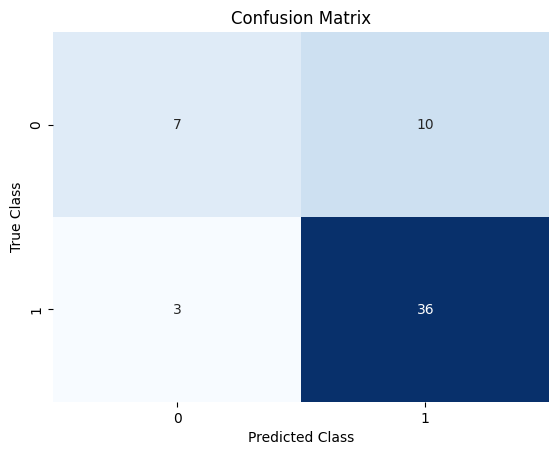

In [ ]:
# Assuming 'Gender' column is used for gender, where 1 indicates female and 0 indicates male
female_mask = X_test['sex'] == 1
X_test_female = X_test[female_mask]
y_true_female = y_test[female_mask]

# Get predictions for females
y_pred_female = rf_classifier.predict(X_test_female)

# Compute the confusion matrix
confusion_female = confusion_matrix(y_true_female, y_pred_female)
sns.heatmap(confusion_female, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

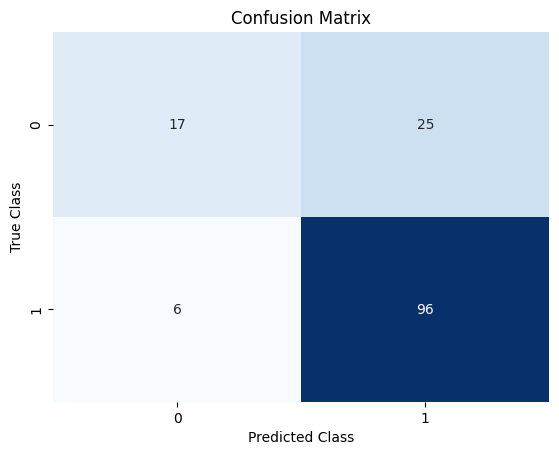

In [ ]:
# Assuming 'Gender' column is used for gender, where 1 indicates female and 0 indicates male
male_mask = X_test['sex'] == 0
X_test_male = X_test[male_mask]
y_true_male = y_test[male_mask]

# Get predictions for females
y_pred_male = rf_classifier.predict(X_test_male)

# Compute the confusion matrix
confusion_female = confusion_matrix(y_true_male, y_pred_male)
sns.heatmap(confusion_female, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

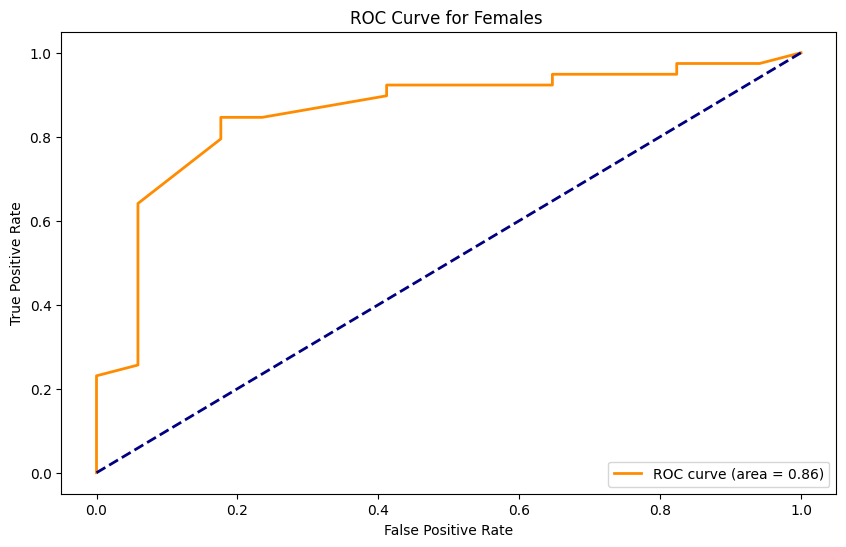

In [ ]:
female_mask = X_test['sex'] == 1
y_probs_female = rf_classifier.predict_proba(X_test[female_mask])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test[female_mask], y_probs_female)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Females ')
plt.legend(loc="lower right")
plt.show()

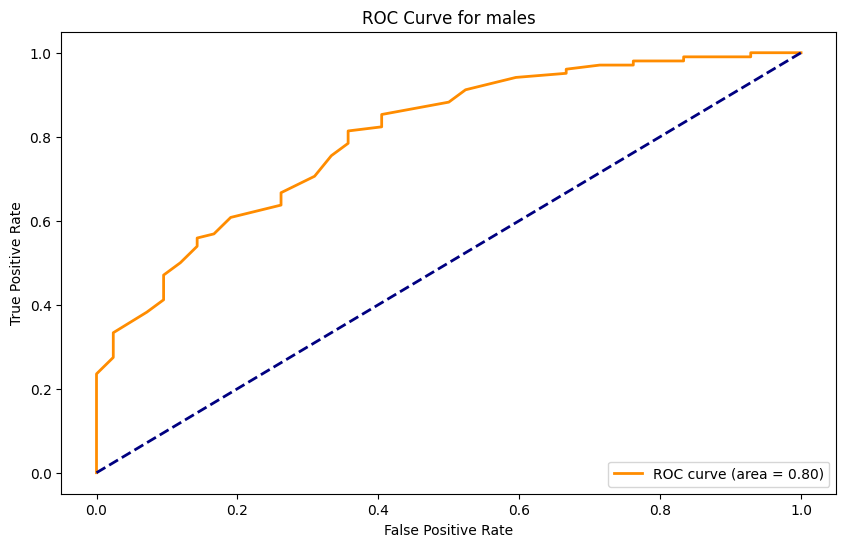

In [ ]:
female_mask = X_test['sex'] == 0
y_probs_female = rf_classifier.predict_proba(X_test[female_mask])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test[female_mask], y_probs_female)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for males')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from aif360.algorithms.preprocessing import Reweighing


In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups,
                privileged_groups=privileged_groups)
dataset_transf_train = RW.fit_transform(dataset_orig_train)

In [ ]:
metric_transf_train = BinaryLabelDatasetMetric(dataset_transf_train,
                                               unprivileged_groups=unprivileged_groups,
                                               privileged_groups=privileged_groups)

print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_transf_train.mean_difference())

Difference in mean outcomes between unprivileged and privileged groups = -0.000000


# MLP

In [ ]:
# Standardize/Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import Lasso

# Create and train the Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)


Lasso(alpha=0.01)

In [ ]:
# Evaluate the model
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

print(f'Lasso Training Score: {lasso_train_score:.2f}')
print(f'Lasso Test Score: {lasso_test_score:.2f}')

Lasso Training Score: 0.21
Lasso Test Score: 0.26


In [ ]:
lasso_coefficients = lasso.coef_
print('Lasso Coefficients:')
print(lasso_coefficients)

Lasso Coefficients:
[ 0.11061981 -0.04836448  0.05463027  0.01122456 -0.03529243 -0.
  0.05144076  0.00461691 -0.02459952 -0.02069249  0.02491482 -0.
 -0.0250601   0.02866009  0.0080553  -0.00200687 -0.          0.
  0.01468401]


In [ ]:
from sklearn.neural_network import MLPClassifier
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(X_train, y_train)

In [ ]:
model5.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [ ]:
y_pred_mlp = model5.predict(X_test)

In [ ]:
#scores
from sklearn import metrics
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp))

Accuracy MLP: 0.765
Precision MLP: 0.8163265306122449
Recall MLP: 0.8571428571428571
F1 Score MLP: 0.8362369337979093


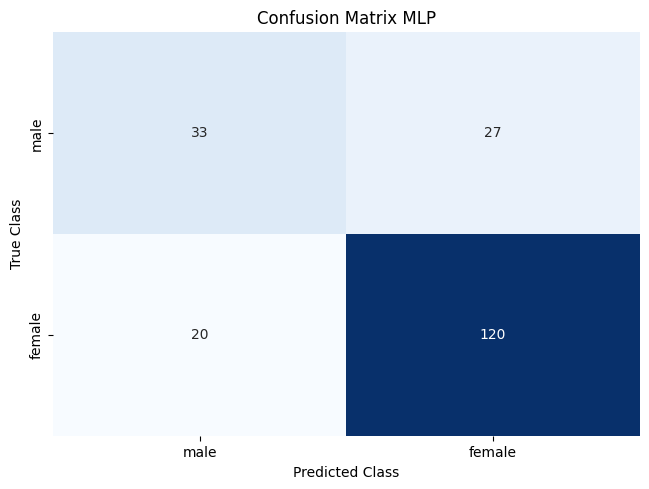

In [ ]:
#CM matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['male', 'female'], columns=['male', 'female'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

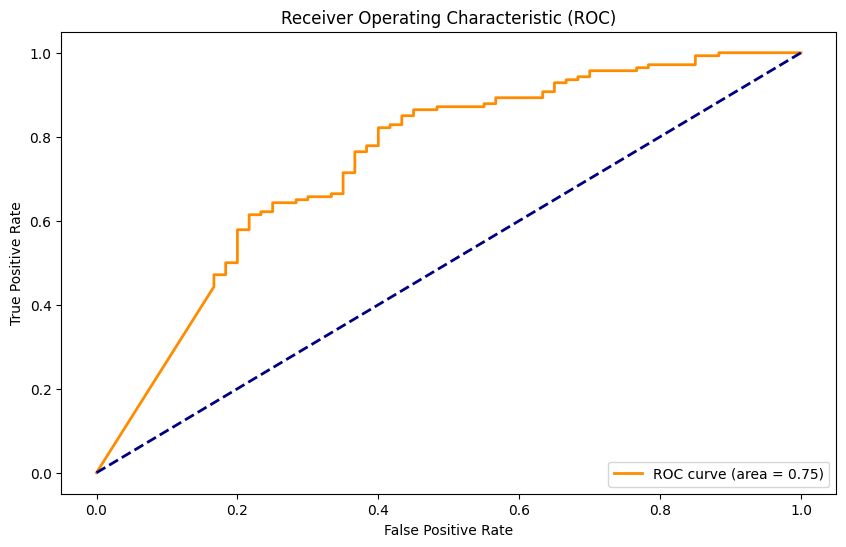

In [ ]:
# Predict probabilities on the test set
y_probs = mlp.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Metrics function
from collections import OrderedDict
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric

dataset = StandardDataset(fair_test_df,
                          label_name='approval',
                          favorable_classes=[1],
                          protected_attribute_names=[sensitive_att],
                          privileged_classes=[[0]])

def fair_metrics(dataset, y_pred_mlp, disp = True):
    dataset_pred =dataset.copy()
    dataset_pred.labels = y_pred_mlp

    attr = dataset_pred.protected_attribute_names[0]

    idx = dataset_pred.protected_attribute_names.index(attr)
    privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}]
    unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}]

    classified_metric_pred = ClassificationMetric(dataset, dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metric_pred = BinaryLabelDatasetMetric(dataset_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()
    metrics["Theil index"] = classified_metric_pred.theil_index()

    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))


fair_metrics(dataset, y_pred_mlp)

Balanced accuracy = 0.7036
Statistical parity difference = -0.0682
Disparate impact = 0.9094
Average odds difference = -0.0221
Equal opportunity difference = -0.0113
Theil index = 0.1464


In [ ]:
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from aif360.metrics.utils import compute_boolean_conditioning_vector

from aif360.metrics import utils
from aif360.datasets import BinaryLabelDataset
from aif360.datasets.multiclass_label_dataset import MulticlassLabelDataset

from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
                import load_preproc_data_adult, load_preproc_data_compas

In [ ]:
X = df.drop(columns=['approval'])
y = df['approval']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify = y_train, random_state=1)

In [ ]:
columns = X_train.columns
X_train_balanced, y_train_balanced=os.fit_resample(X_train, y_train)

In [ ]:
### combine the sets together to make them compatible with the AIF360 library ###
balanced_german_train_df = pd.concat([X_train_balanced, y_train_balanced], axis=1, join="inner")

In [ ]:
import pandas as pd

# Assuming X_test and y_test are numpy arrays
X_test = pd.DataFrame(X_test)  # Convert X_test to a DataFrame
y_test = pd.Series(y_test)     # Convert y_test to a Series

# Now, you can concatenate them
german_test_df = pd.concat([X_test, y_test], axis=1, join="inner")


In [ ]:
german_val_df = pd.concat([X_val, y_val], axis=1, join="inner")

In [ ]:
import aif360

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_train = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=balanced_german_train_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_valid = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=german_val_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig_test = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=german_test_df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
from aif360.algorithms.preprocessing import DisparateImpactRemover
dataset_orig = aif360.datasets.BinaryLabelDataset(
    favorable_label=1,
    unfavorable_label=0,
    df=df,
    label_names=['approval'],
    protected_attribute_names=[sensitive_att])

In [ ]:
privileged_groups = [{sensitive_att: 0}]
unprivileged_groups = [{sensitive_att: 1}]
cost_constraint = "fnr"
randseed = 12345679


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scale_orig = StandardScaler()

# Fit and transform X_train
X_train = scale_orig.fit_transform(dataset_orig_train.features)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the same preprocessing to both X_train and X_valid
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



In [ ]:
print(f"X_valid shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_valid shape: (200, 19)
X_test shape: (200, 19)


In [ ]:
fav_idx = np.where(mlp.classes_ == dataset_orig_train.favorable_label)[0][0]

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming data is loaded and preprocessed

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, both X_train and y_train should have the same number of samples


In [ ]:
from sklearn.neural_network import MLPClassifier

# Assuming you have defined your MLP model like this (you can customize the parameters):
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100, random_state=42)

# Train the MLP model on your training data (X_train and y_train)
mlp.fit(X_train, y_train)

# Now you can use the predict_proba method
y_valid_pred_prob_mlp = mlp.predict_proba(X_val)[:, fav_idx]
y_test_pred_prob_mlp = mlp.predict_proba(X_test)[:, fav_idx]
dataset_orig_train_pred = dataset_orig_train.copy(deepcopy=True)
dataset_orig_valid_pred = dataset_orig_valid.copy(deepcopy=True)
dataset_orig_test_pred = dataset_orig_test.copy(deepcopy=True)

dataset_new_valid_pred = dataset_orig_valid.copy(deepcopy=True)
dataset_new_test_pred = dataset_orig_test.copy(deepcopy=True)

# Apply the same process as for the Random Forest Classifier
dataset_new_valid_pred.scores = y_valid_pred_prob_mlp.reshape(-1, 1)
dataset_new_test_pred.scores = y_test_pred_prob_mlp.reshape(-1, 1)

class_thresh = 0.5  # Define an appropriate threshold value


y_valid_pred_mlp = np.zeros_like(dataset_new_valid_pred.labels)
y_valid_pred_mlp[y_valid_pred_prob_mlp >= class_thresh] = dataset_new_valid_pred.favorable_label
y_valid_pred_mlp[~(y_valid_pred_prob_mlp >= class_thresh)] = dataset_new_valid_pred.unfavorable_label
dataset_new_valid_pred.labels = y_valid_pred_mlp

y_test_pred_mlp = np.zeros_like(dataset_new_test_pred.labels)
y_test_pred_mlp[y_test_pred_prob_mlp >= class_thresh] = dataset_new_test_pred.favorable_label
y_test_pred_mlp[~(y_test_pred_prob_mlp >= class_thresh)] = dataset_new_test_pred.unfavorable_label
dataset_new_test_pred.labels = y_test_pred_mlp



In [ ]:

### fairness Metrics function ###
from collections import OrderedDict
from aif360.metrics import ClassificationMetric

def compute_metrics(dataset_true, dataset_pred,
                    unprivileged_groups, privileged_groups,
                    disp = True):
    """ Compute the key metrics """
    classified_metric_pred = ClassificationMetric(dataset_true,
                                                 dataset_pred,
                                                 unprivileged_groups=unprivileged_groups,
                                                 privileged_groups=privileged_groups)
    metrics = OrderedDict()
    metrics["Balanced accuracy"] = 0.5*(classified_metric_pred.true_positive_rate()+
                                             classified_metric_pred.true_negative_rate())
    metrics["Statistical parity difference"] = classified_metric_pred.statistical_parity_difference()
    metrics["Disparate impact"] = classified_metric_pred.disparate_impact()
    metrics["Average odds difference"] = classified_metric_pred.average_odds_difference()
    metrics["Equal opportunity difference"] = classified_metric_pred.equal_opportunity_difference()

    if disp:
        for k in metrics:
            print("%s = %.4f" % (k, metrics[k]))

In [ ]:

### Perform Calibrated Equality of Odds Pleiss et al., 2017 ###

from aif360.algorithms.postprocessing.calibrated_eq_odds_postprocessing import CalibratedEqOddsPostprocessing
from tqdm import tqdm

# Learn qualize odds and apply to create a new dataset ###
cpp = CalibratedEqOddsPostprocessing(privileged_groups = privileged_groups,
                                     unprivileged_groups = unprivileged_groups,
                                     cost_constraint=cost_constraint,
                                     seed=randseed)
cpp = cpp.fit(dataset_orig_valid, dataset_orig_valid_pred)

In [ ]:
### Transform test data using the post processing algorithm

dataset_transf_test_pred = cpp.predict(dataset_orig_test_pred)

In [ ]:
 ### fairness metrics extraction ###

metric_test_aft = compute_metrics(dataset_orig_test, dataset_transf_test_pred,
                                  unprivileged_groups, privileged_groups,
                                  disp = True)

Balanced accuracy = 1.0000
Statistical parity difference = -0.1218
Disparate impact = 0.8339
Average odds difference = 0.0000
Equal opportunity difference = 0.0000


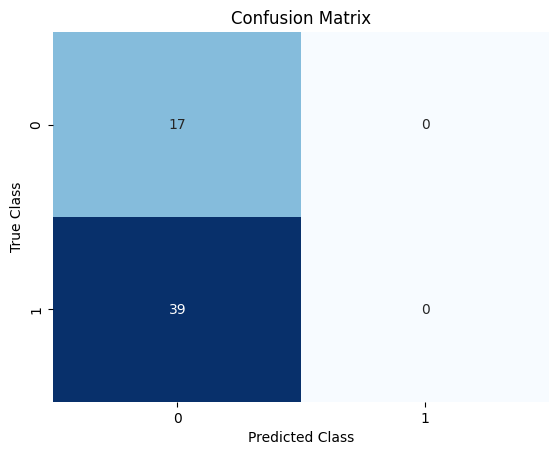

In [ ]:
# Assuming 'Gender' column is used for gender, where 1 indicates female and 0 indicates male
female_mask = X_test['sex'] == 1
X_test_female = X_test[female_mask]
y_true_female = y_test[female_mask]

# Get predictions for females
y_pred_female = mlp.predict(X_test_female)

# Compute the confusion matrix
confusion_female = confusion_matrix(y_true_female, y_pred_female)
sns.heatmap(confusion_female, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

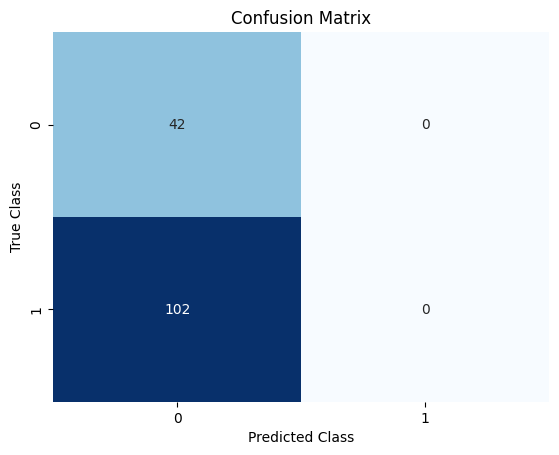

In [ ]:
# Assuming 'Gender' column is used for gender, where 1 indicates female and 0 indicates male
male_mask = X_test['sex'] == 0
X_test_male = X_test[male_mask]
y_true_male = y_test[male_mask]

# Get predictions for females
y_pred_male = mlp.predict(X_test_male)

# Compute the confusion matrix
confusion_female = confusion_matrix(y_true_male, y_pred_male)
sns.heatmap(confusion_female, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

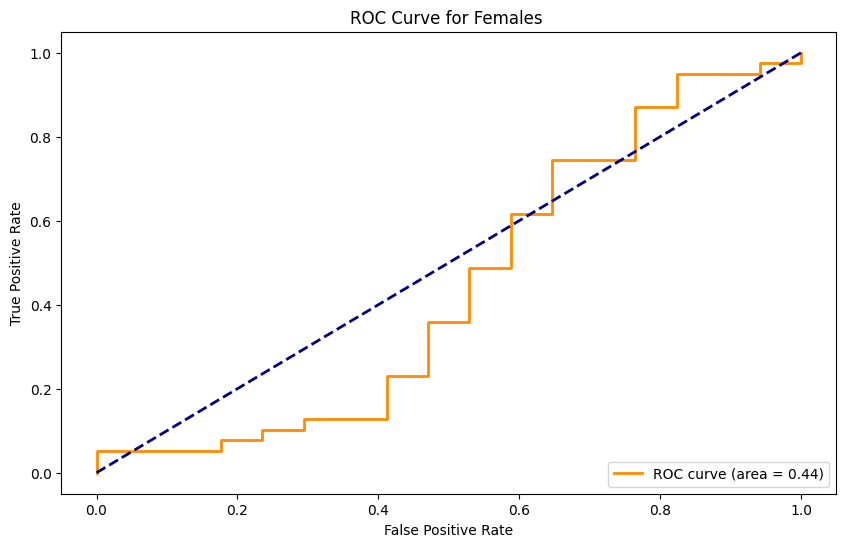

In [ ]:
female_mask = X_test['sex'] == 1
y_probs_female = mlp.predict_proba(X_test[female_mask])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test[female_mask], y_probs_female)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Females ')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(y_true_male, y_pred_male)
print(len(y_true_male), len(y_pred_male))
y_true =list(y_true_male)
print(y_true)

737    1
740    1
660    1
411    1
678    1
      ..
199    0
213    0
408    1
208    1
78     1
Name: approval, Length: 144, dtype: int64 [1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
144 144
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]


In [ ]:
def compare_values(y_true_male, y_pred_male):
    if y_true_male == y_pred_male:
        return "True Positve."
    else:
        return "False Positive."

y_true_male = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]

y_pred_male = [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]

result = compare_values(y_true_male, y_pred_male)
print(result)


False Positive.


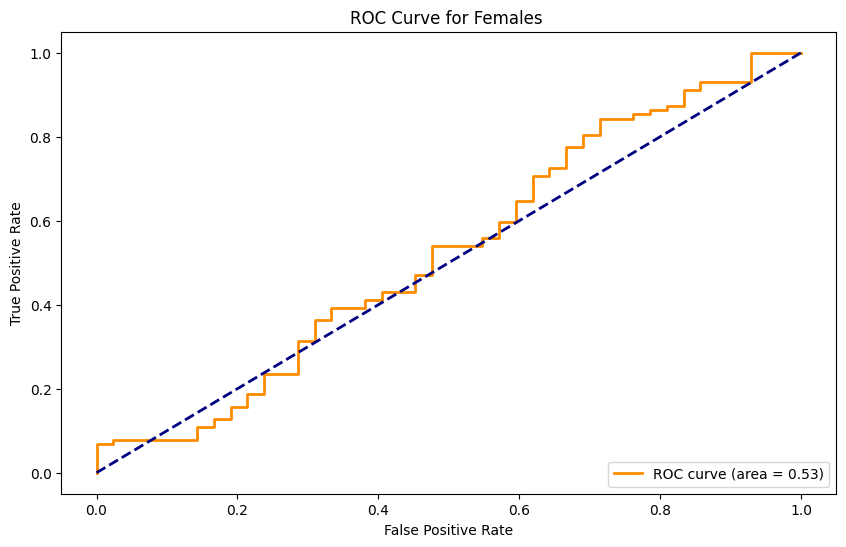

In [ ]:
 njnmale_mask = X_test['sex'] == 0
y_probs_male = mlp.predict_proba(X_test[male_mask])[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test[male_mask], y_probs_male)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Females ')
plt.legend(loc="lower right")
plt.show()